<a href="https://colab.research.google.com/github/Ramandeep-Singh17/Machine-Learning/blob/main/CarpricePrediction_Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
#a project of car price prediction from start

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [320]:
df=pd.read_csv('ford.csv')
df

model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...           ...  
17961         1.4  
17962         1.0  
17963         1.6  
17964         1.2  
17965         1.0  

[17966 rows x 9 columns]

In [321]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0

In [322]:
df.shape

(17966, 9)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [324]:
df.describe()

year         price        mileage           tax           mpg  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17966.000000   
mean    2016.866470  12279.534844   23362.608761    113.329456     57.906980   
std        2.050336   4741.343657   19472.054349     62.012456     10.125696   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9987.000000     30.000000     52.300000   
50%     2017.000000  11291.000000   18242.500000    145.000000     58.900000   
75%     2018.000000  15299.000000   31060.000000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         engineSize  
count  17966.000000  
mean       1.350807  
std        0.432367  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000

In [325]:
df.isnull().sum()# hamare dataset me koi null valuse nhi hai hm apna kaam start kar sakte hai

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# EDA

price feature per eda laga ke dekhte hai

<Axes: xlabel='price', ylabel='Count'>

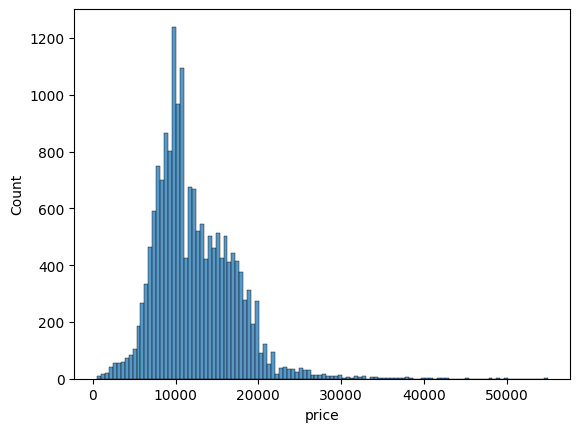

In [326]:
sns.histplot(df['price'])#distributuion dikhane ke liye ye best hai.

<Axes: xlabel='price', ylabel='Count'>

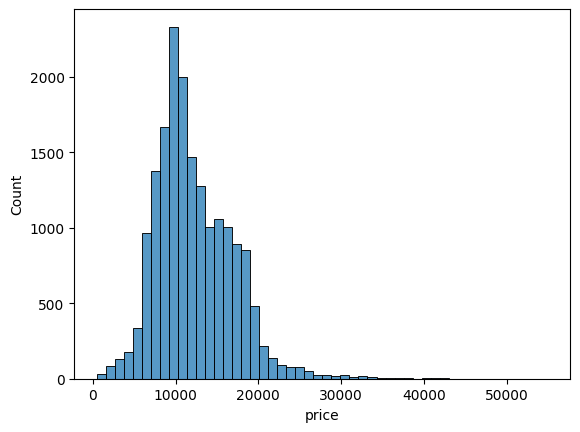

In [327]:
sns.histplot(df['price'],bins=50)

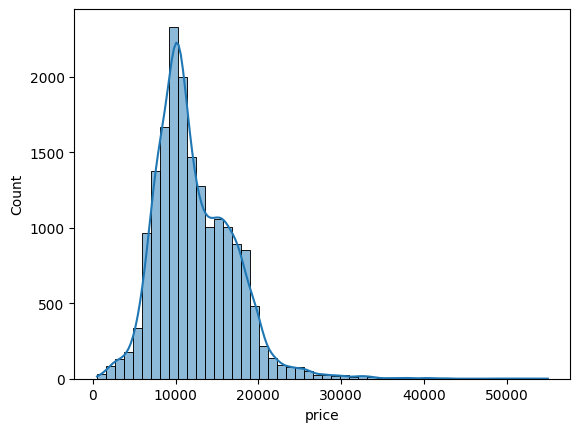

In [328]:
sns.histplot(df['price'],bins=50,kde=True);#kernal desensity estimator line dikhane ke liye

In [329]:
df.corr(numeric_only=True)# co relation price se dekhne ke liye
#sirf number wale column ka relation nikalne ke liye

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.636009 -0.707818  0.298506 -0.022967   -0.137311
price       0.636009  1.000000 -0.530659  0.406857 -0.346419    0.411178
mileage    -0.707818 -0.530659  1.000000 -0.260451  0.120075    0.215035
tax         0.298506  0.406857 -0.260451  1.000000 -0.502980    0.184363
mpg        -0.022967 -0.346419  0.120075 -0.502980  1.000000   -0.260521
engineSize -0.137311  0.411178  0.215035  0.184363 -0.260521    1.000000

correlation dikhane ke liye heat map best hai and annot =True se hm uske value dikha sakte hai.

<Axes: >

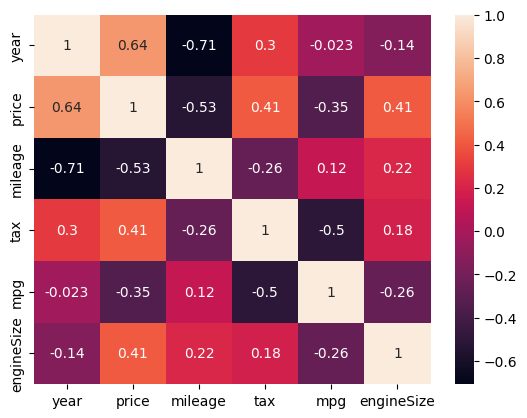

In [330]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

<Axes: xlabel='year', ylabel='price'>

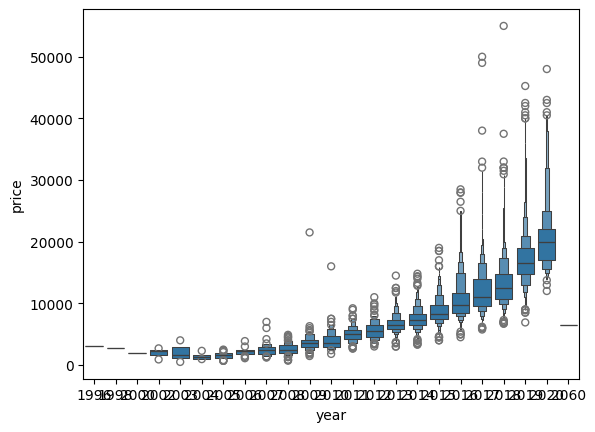

In [331]:
#sabka correlation dekhenge
sns.boxenplot(data=df,x='year',y='price')
# hm dekh skate hai ki year ke sath price bahut badh rha hai

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

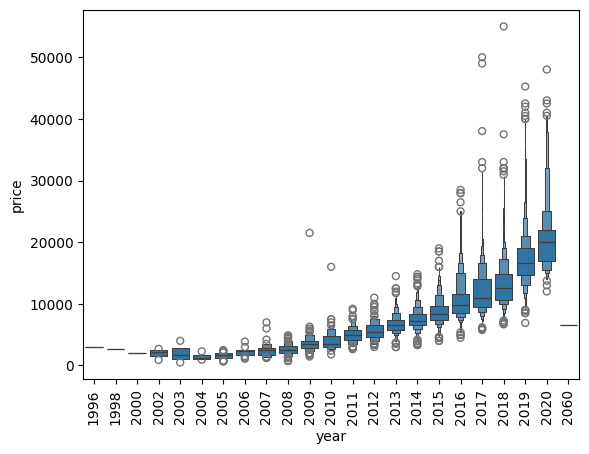

In [332]:
sns.boxenplot(data=df,x='year',y='price')
plt.xticks(rotation=90)# hmne roate karke overlapping ko hataya hai.

<Axes: xlabel='mileage', ylabel='price'>

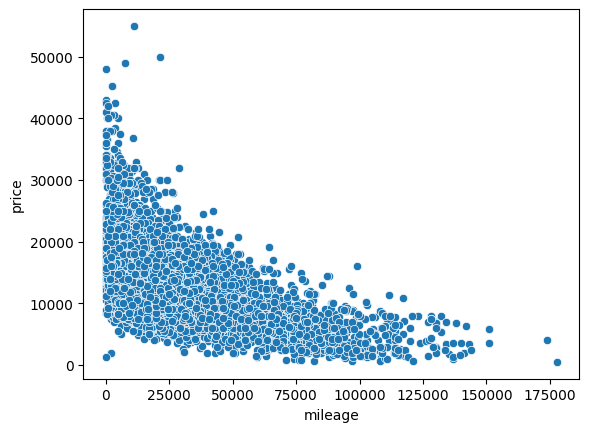

In [333]:
sns.scatterplot(data=df,x='mileage',y='price')
# hm price ko milage se dekh rhe hai(-ve hai value badh rhi hai tu price jayda hai,milage kam hai tu price jayda hai)

<Axes: xlabel='engineSize', ylabel='price'>

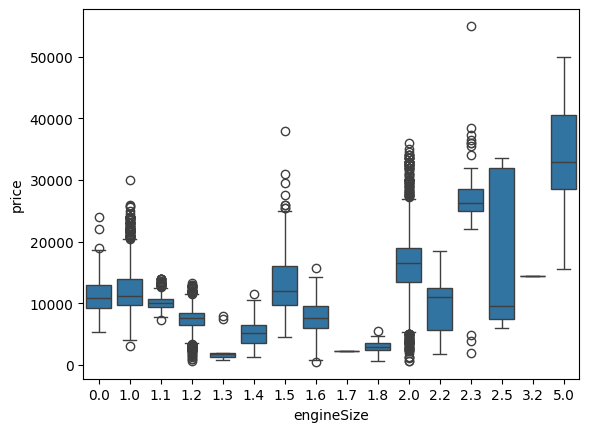

In [334]:
sns.boxplot(data=df,x='engineSize',y='price')#highly coreelated

<Axes: xlabel='transmission', ylabel='price'>

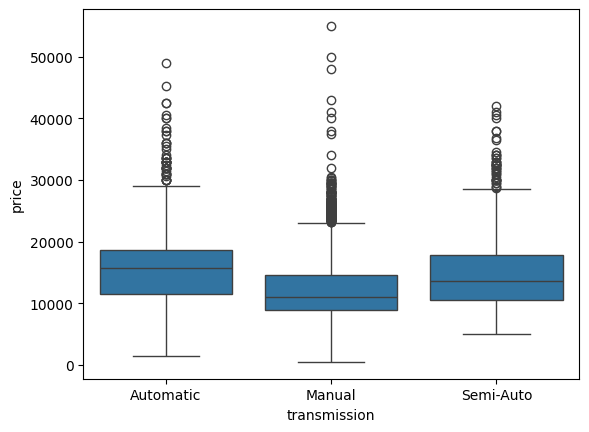

In [335]:
sns.boxplot(data=df,x='transmission',y='price')#
#teen transimission hai hm ise heatmap per nhi dekh pa rhe hai kyuki wo numerical dta nhi hai
#ssabhi ka distribution laghbhag same hai tu jayda correlated nhi hai

<Axes: xlabel='fuelType', ylabel='price'>

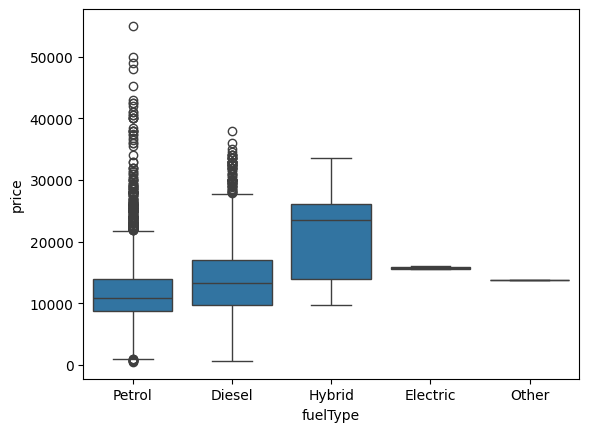

In [336]:
sns.boxplot(data=df,x='fuelType',y='price')#highly coreelated petrol me bahut outliers hai\

#so kuch relation hai price and petrol me

<Axes: xlabel='model', ylabel='price'>

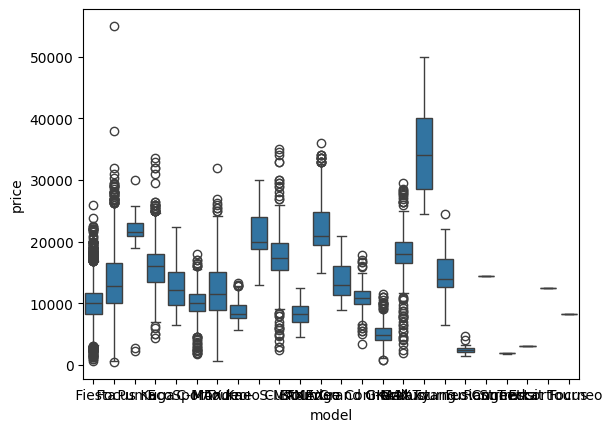

In [337]:
sns.boxplot(x = df['model'],y = df['price'])# ye categorhical variable hai
# so we will useplt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

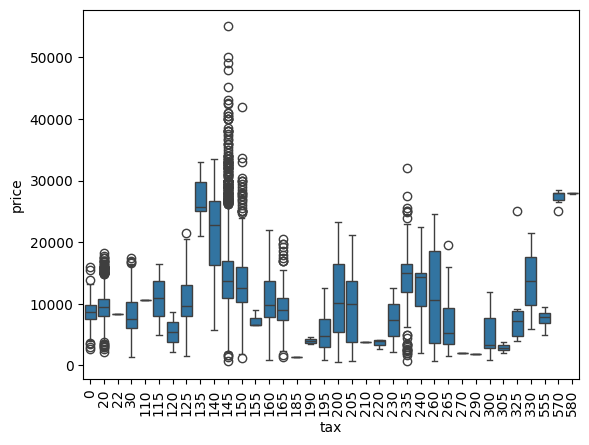

In [338]:
sns.boxplot(x = df['tax'],y = df['price'])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89],
 [Text(0, 0, '20.8'),
  Text(1, 0, '20.9'),
  Text(2, 0, '22.1'),
  Text(3, 0, '22.6'),
  Text(4, 0, '22.8'),
  Text(5, 0, '23.5'),
  Text(6, 0, '23.7'),
  Text(7, 0, '23.9'),
  Text(8, 0, '24.8'),
  Text(9, 0, '26.3'),
  Text(10, 0, '27.4'),
  Text(11, 0, '28.0'),
  Text(12, 0, '28.3'),
  Text(13, 0, '28.5'),
  Text(14, 0, '28.8'),
  Text(15, 0, '29.1'),
  Text(16, 0, '29.4'),
  Text(17, 0, '30.1'),
  Text(18, 0, '30.4'),
  Text(19, 0, '30.7'),
  Text(20, 0, '31.0

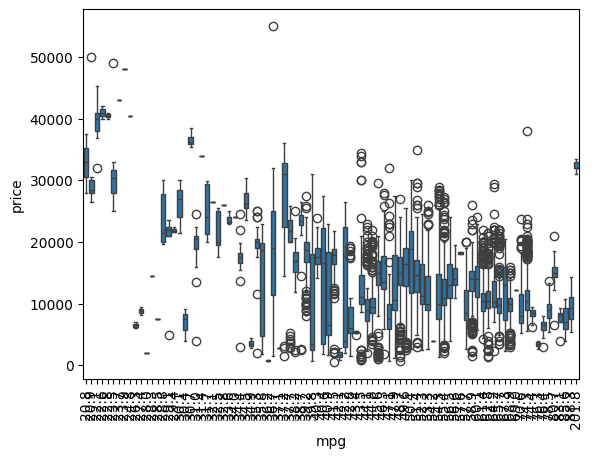

In [339]:
sns.boxplot(x = df['mpg'],y = df['price'])
plt.xticks(rotation = 90)

In [340]:
x=df.drop(columns=['price'])# hm x me sare feature ko dekhenge except price kyuki wo output feature hai
y=df['price']
#price ko hi predict karna hai

In [341]:
x

model  year transmission  mileage fuelType  tax   mpg  engineSize
0       Fiesta  2017    Automatic    15944   Petrol  150  57.7         1.0
1        Focus  2018       Manual     9083   Petrol  150  57.7         1.0
2        Focus  2017       Manual    12456   Petrol  150  57.7         1.0
3       Fiesta  2019       Manual    10460   Petrol  145  40.3         1.5
4       Fiesta  2019    Automatic     1482   Petrol  145  48.7         1.0
...        ...   ...          ...      ...      ...  ...   ...         ...
17961    B-MAX  2017       Manual    16700   Petrol  150  47.1         1.4
17962    B-MAX  2014       Manual    40700   Petrol   30  57.7         1.0
17963    Focus  2015       Manual     7010   Diesel   20  67.3         1.6
17964       KA  2018       Manual     5007   Petrol  145  57.7         1.2
17965    Focus  2015       Manual     5007   Petrol   22  57.7         1.0

[17966 rows x 8 columns]

In [342]:
#hm x ko encode karke numeric value me lana chahte haiis;iye ise encode karengetaki wo numeric value me aa jaye
# x_encoded=pd.get_dummies(x)
# x_encoded

In [343]:
x_one_encoded=pd.get_dummies(x,columns=['model','transmission','fuelType'],drop_first=True)
x_one_encoded
#jo column pahle 8 the ab 34 ho gye hai
# jo jo pahle string tha use hm (true false) me convert kar diye hai.
# ab ko (true false) ko hm 0 and 1 me convert kar denge

year  mileage  tax   mpg  engineSize  model_ C-MAX  model_ EcoSport  \
0      2017    15944  150  57.7         1.0         False            False   
1      2018     9083  150  57.7         1.0         False            False   
2      2017    12456  150  57.7         1.0         False            False   
3      2019    10460  145  40.3         1.5         False            False   
4      2019     1482  145  48.7         1.0         False            False   
...     ...      ...  ...   ...         ...           ...              ...   
17961  2017    16700  150  47.1         1.4         False            False   
17962  2014    40700   30  57.7         1.0         False            False   
17963  2015     7010   20  67.3         1.6         False            False   
17964  2018     5007  145  57.7         1.2         False            False   
17965  2015     5007   22  57.7         1.0         False            False   

       model_ Edge  model_ Escort  model_ Fiesta  ...  model_ Tourneo Connect  \
0            False          False           True  ...                   False   
1            False          False          False  ...                   False   
2            False          False          False  ...                   False   
3            False          False           True  ...                   False   
4            False          False           True  ...                   False   
...            ...            ...            ...  ...                     ...   
17961        False          False          False  ...                   False   
17962        False          False          False  ...                   False   
17963        False          False          False  ...                   False   
17964        False          False          False  ...                   False   
17965        False          False          False  ...                   False   

       model_ Tourneo Custom  model_ Transit Tourneo  model_Focus  \
0                      False                   False        False   
1                      False                   False        False   
2                      False                   False        False   
3                      False                   False        False   
4                      False                   False        False   
...                      ...                     ...          ...   
17961                  False                   False        False   
17962                  False                   False        False   
17963                  False                   False        False   
17964                  False                   False        False   
17965                  False                   False         True   

       transmission_Manual  transmission_Semi-Auto  fuelType_Electric  \
0                    False                   False              False   
1                     True                   False              False   
2                     True                   False              False   
3                     True                   False              False   
4                    False                   False              False   
...                    ...                     ...                ...   
17961                 True                   False              False   
17962                 True                   False              False   
17963                 True                   False              False   
17964                 True                   False              False   
17965                 True                   False              False   

       fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                False           False             True  
1                False           False             True  
2                False           False             True  
3                False           False             True  
4                False           False             True  
...                ...             ...     

In [344]:
x_one_encoded = x_one_encoded.astype(int)
x_one_encoded

year  mileage  tax  mpg  engineSize  model_ C-MAX  model_ EcoSport  \
0      2017    15944  150   57           1             0                0   
1      2018     9083  150   57           1             0                0   
2      2017    12456  150   57           1             0                0   
3      2019    10460  145   40           1             0                0   
4      2019     1482  145   48           1             0                0   
...     ...      ...  ...  ...         ...           ...              ...   
17961  2017    16700  150   47           1             0                0   
17962  2014    40700   30   57           1             0                0   
17963  2015     7010   20   67           1             0                0   
17964  2018     5007  145   57           1             0                0   
17965  2015     5007   22   57           1             0                0   

       model_ Edge  model_ Escort  model_ Fiesta  ...  model_ Tourneo Connect  \
0                0              0              1  ...                       0   
1                0              0              0  ...                       0   
2                0              0              0  ...                       0   
3                0              0              1  ...                       0   
4                0              0              1  ...                       0   
...            ...            ...            ...  ...                     ...   
17961            0              0              0  ...                       0   
17962            0              0              0  ...                       0   
17963            0              0              0  ...                       0   
17964            0              0              0  ...                       0   
17965            0              0              0  ...                       0   

       model_ Tourneo Custom  model_ Transit Tourneo  model_Focus  \
0                          0                       0            0   
1                          0                       0            0   
2                          0                       0            0   
3                          0                       0            0   
4                          0                       0            0   
...                      ...                     ...          ...   
17961                      0                       0            0   
17962                      0                       0            0   
17963                      0                       0            0   
17964                      0                       0            0   
17965                      0                       0            1   

       transmission_Manual  transmission_Semi-Auto  fuelType_Electric  \
0                        0                       0                  0   
1                        1                       0                  0   
2                        1                       0                  0   
3                        1                       0                  0   
4                        0                       0                  0   
...                    ...                     ...                ...   
17961                    1                       0                  0   
17962                    1                       0                  0   
17963                    1                       0                  0   
17964                    1                       0                  0   
17965                    1                       0                  0   

       fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                    0               0                1  
1                    0               0                1  
2                    0               0                1  
3                    0               0                1  
4                    0               0                1  
...                ...             ...              ...

In [345]:
# ab hm label encoding karenge jisse 34 column nhi banke usi 34 column me dusri value ban jayegi
from sklearn.preprocessing import LabelEncoder# yaad nhi tu chatgpt karo ya documnetation per jao.
# bas ye pta hona chahiye ki kya and kyu kar rhe hai.

columns = ['model', 'transmission', 'fuelType']# jis jis ko  one hot encode kiye the unhe convert kiye hai

xlable = x.copy()  # make a safe copy
label_encoders = {}

for col in columns:# yaad nhi hoga jake documentation se dekhna hai ki kaise karte hai
    le = LabelEncoder()# isko loop ke bahar karne se hamesha 0 aa sakta hai from chatgpt
    xlable[col] = le.fit_transform(xlable[col].astype(str))  # Convert to string in case of nulls
    label_encoders[col] = le
xlable


model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]

In [346]:
from sklearn.preprocessing import StandardScaler# yaad hona jaruri nhi islie documentation se nikal lena ya chatgpt se
#standard scaler ka use karke sabhi ko single scle per le aaunga sabhi value ko 0 and 1 ke beach me

In [347]:
#numerical column ko standardscale karna hai inko 'year', 'mileage', 'tax', 'mpg', 'engineSize' x one encoded me
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
x_one_encoded[numerical_cols] = scaler.fit_transform(x_one_encoded[numerical_cols]) # bas ye pta hona chiye ki numerical column kp bhej rhe hai
# taki use standard scale kar sake apne kaam ke hisab se.
x_one_encoded

year   mileage       tax       mpg  engineSize  model_ C-MAX  \
0      0.065128 -0.380998  0.591358 -0.042122   -0.447984             0   
1      0.552866 -0.733359  0.591358 -0.042122   -0.447984             0   
2      0.065128 -0.560132  0.591358 -0.042122   -0.447984             0   
3      1.040605 -0.662640  0.510727 -1.721198   -0.447984             0   
4      1.040605 -1.123724  0.510727 -0.931045   -0.447984             0   
...         ...       ...       ...       ...         ...           ...   
17961  0.065128 -0.342172  0.591358 -1.029814   -0.447984             0   
17962 -1.398088  0.890398 -1.343791 -0.042122   -0.447984             0   
17963 -0.910349 -0.839822 -1.505053  0.945569   -0.447984             0   
17964  0.552866 -0.942690  0.510727 -0.042122   -0.447984             0   
17965 -0.910349 -0.942690 -1.472801 -0.042122   -0.447984             0   

       model_ EcoSport  model_ Edge  model_ Escort  model_ Fiesta  ...  \
0                    0            0              0              1  ...   
1                    0            0              0              0  ...   
2                    0            0              0              0  ...   
3                    0            0              0              1  ...   
4                    0            0              0              1  ...   
...                ...          ...            ...            ...  ...   
17961                0            0              0              0  ...   
17962                0            0              0              0  ...   
17963                0            0              0              0  ...   
17964                0            0              0              0  ...   
17965                0            0              0              0  ...   

       model_ Tourneo Connect  model_ Tourneo Custom  model_ Transit Tourneo  \
0                           0                      0                       0   
1                           0                      0                       0   
2                           0                      0                       0   
3                           0                      0                       0   
4                           0                      0                       0   
...                       ...                    ...                     ...   
17961                       0                      0                       0   
17962                       0                      0                       0   
17963                       0                      0                       0   
17964                       0                      0                       0   
17965                       0                      0                       0   

       model_Focus  transmission_Manual  transmission_Semi-Auto  \
0                0                    0                       0   
1                0                    1                       0   
2                0                    1                       0   
3                0                    1                       0   
4                0                    0                       0   
...            ...                  ...                     ...   
17961            0                    1                       0   
17962            0                    1                       0   
17963            0                    1                       0   
17964            0                    1                       0   
17965            1                    1                       0   

       fuelType_Electric  fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                      0                0               0                1  
1                      0                0               0                1  
2                      0                0               0                1  
3                      0                0               0                1  
4                      0                0               0             

In [348]:
xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] =scaler.fit_transform(xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])
xlable

model      year  transmission   mileage  fuelType       tax  \
0     -0.460699  0.065128     -2.670032 -0.380998  0.688777  0.591358   
1     -0.211477  0.552866      0.041351 -0.733359  0.688777  0.591358   
2     -0.211477  0.065128      0.041351 -0.560132  0.688777  0.591358   
3     -0.460699  1.040605      0.041351 -0.662640  0.688777  0.510727   
4     -0.460699  1.040605     -2.670032 -1.123724  0.688777  0.510727   
...         ...       ...           ...       ...       ...       ...   
17961 -1.706810  0.065128      0.041351 -0.342172  0.688777  0.591358   
17962 -1.706810 -1.398088      0.041351  0.890398  0.688777 -1.343791   
17963 -0.211477 -0.910349      0.041351 -0.839822 -1.454098 -1.505053   
17964  1.034634  0.552866      0.041351 -0.942690  0.688777  0.510727   
17965  4.025302 -0.910349      0.041351 -0.942690  0.688777 -1.472801   

            mpg  engineSize  
0     -0.020442   -0.811386  
1     -0.020442   -0.811386  
2     -0.020442   -0.811386  
3     -1.738890    0.345070  
4     -0.909294   -0.811386  
...         ...         ...  
17961 -1.067312    0.113779  
17962 -0.020442   -0.811386  
17963  0.927668    0.576362  
17964 -0.020442   -0.348804  
17965 -0.020442   -0.811386  

[17966 rows x 8 columns]

In [349]:
#model making by x_one_encoded and dusra xlable se
#lable se 8 column mila tha and one hot encoding se 34

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [351]:
# model banane se pahle use create kiye and train karna chahte hai and hm testing ke liye 20% testing ke liye rakha hai
X_train, X_test, y_train, y_test = train_test_split(x_one_encoded, y, test_size=0.20, random_state=42)

In [352]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [353]:
y_pred = model.predict(X_test)

In [354]:
y_pred

array([ 6866.3580764 ,  9347.6810129 ,  9362.18320785, ...,
       31454.95287518,  9781.20362786, 15253.49970894])

In [355]:

y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

In [356]:
r2 = r2_score(y_test,y_pred)
r2

0.8464177711972799

In [357]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)
#so adjusted r2 bhi lagbhag barabar hai r2 kw tu ye model sahi hai iski accuracy 84% hai approx

Adjusted R² Score: 0.8449505624927864


In [358]:
# ab hm dura linear regression model bna rhe hai xlbale ke liye jise model2 bol rhe hai.

In [359]:
X_train, X_test, y_train, y_test = train_test_split(xlable, y, test_size=0.20, random_state=42)

In [360]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [361]:
y_pred = model2.predict(X_test)
y_pred

array([ 6152.07567671,  9374.39134399,  9464.92264335, ...,
       21787.05312508,  9776.43926374, 15806.24990719])

In [362]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

In [363]:
r2 = r2_score(y_test,y_pred)
r2

0.7365884288851352

In [364]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.7360006206371801


In [365]:
#hm dono se milkar ye checck kar rhe hai ki kaunsa acha hoga
#one hot encoding karke % kafi jayda acha hai laghbhag 84% isliye hm one hot encoding karte hai.
# but usme 34 input hai phir bhi wo acha hai user se hm itne input tu nhi lenge isliye hm ransom forest,pca wagera se kam karna skihenge.